#visit url https://pycaret.org/install/
#create environment
#pip install pycaret
#conda activate pycaret (envname)
#python -m ipykernel install --user --name pycaret(envname)

In [1]:
#import dataset
#https://pycaret.org/get-data/
from pycaret.datasets import get_data
#create a dataframe
data=get_data('juice')
#the head of dataset is shown immediately

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
Id                1070 non-null int64
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(6), object(2)
memory usage: 159.0+ KB


#Apply a simple machine learning
#no feature engineering


In [3]:
#pima diabetes classification
diab_df=get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diab_df['Class variable'].value_counts()

0    500
1    268
Name: Class variable, dtype: int64

In [5]:
from pycaret.classification import *
model=setup(data=diab_df,target='Class variable')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6818
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
#train classifier after successful setup
#compare models ... will compare different models in the library
compare_models()
#see the highlighted features after processing complete

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.7841,0.8235,0.6143,0.7313,0.6637,0.5068
1,Ridge Classifier,0.7729,0,0.5713,0.7256,0.6345,0.4737
2,Linear Discriminant Analysis,0.771,0.8243,0.5769,0.715,0.6352,0.4716
3,Ada Boost Classifier,0.7691,0.8264,0.5977,0.7057,0.6393,0.4725
4,Extreme Gradient Boosting,0.7635,0.8346,0.5982,0.6902,0.6369,0.4634
5,CatBoost Classifier,0.7579,0.8354,0.5877,0.6794,0.6236,0.4482
6,Extra Trees Classifier,0.7561,0.8178,0.5401,0.6973,0.6036,0.4327
7,Gradient Boosting Classifier,0.7541,0.8319,0.576,0.6745,0.6175,0.4385
8,Random Forest Classifier,0.7523,0.8007,0.5608,0.6907,0.608,0.4314
9,K Neighbors Classifier,0.7503,0.79,0.5921,0.6587,0.6193,0.4352


In [22]:
#create a model --gradient booster
gb=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6724,0.7197,0.4500,0.5294,0.4865,0.2483
1,0.6897,0.7803,0.5000,0.5556,0.5263,0.2965
2,0.7759,0.8105,0.7500,0.6522,0.6977,0.5210
3,0.8276,0.8855,0.8500,0.7083,0.7727,0.6357
4,0.6897,0.6908,0.4500,0.5625,0.5000,0.2790
5,0.8103,0.8507,0.7143,0.7500,0.7317,0.5852
6,0.6842,0.8568,0.3500,0.5833,0.4375,0.2366
7,0.7719,0.8149,0.7000,0.6667,0.6829,0.5050
8,0.7719,0.8649,0.7000,0.6667,0.6829,0.5050
9,0.8246,0.9122,0.6500,0.8125,0.7222,0.5963


In [8]:
tuned_model=tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7963,0.8526,0.6842,0.7222,0.7027,0.5479
1,0.8148,0.8707,0.5789,0.8462,0.6875,0.5624
2,0.8148,0.8376,0.5789,0.8462,0.6875,0.5624
3,0.7222,0.7880,0.5263,0.6250,0.5714,0.3682
4,0.7778,0.8376,0.7368,0.6667,0.7000,0.5242
5,0.7593,0.8286,0.6316,0.6667,0.6486,0.4658
6,0.7593,0.8677,0.6316,0.6667,0.6486,0.4658
7,0.7547,0.8730,0.5000,0.6923,0.5806,0.4136
8,0.7925,0.8619,0.6667,0.7059,0.6857,0.5310
9,0.7547,0.8175,0.5000,0.6923,0.5806,0.4136


In [9]:
knn_tuned_model=tune_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7778,0.8211,0.5263,0.7692,0.6250,0.4749
1,0.7778,0.8571,0.5789,0.7333,0.6471,0.4882
2,0.8148,0.8526,0.6316,0.8000,0.7059,0.5735
3,0.6852,0.7850,0.3684,0.5833,0.4516,0.2463
4,0.7963,0.8286,0.6842,0.7222,0.7027,0.5479
5,0.7407,0.8241,0.5789,0.6471,0.6111,0.4176
6,0.8148,0.8902,0.6316,0.8000,0.7059,0.5735
7,0.7736,0.8778,0.5000,0.7500,0.6000,0.4508
8,0.7736,0.8540,0.5556,0.7143,0.6250,0.4664
9,0.7547,0.7968,0.5000,0.6923,0.5806,0.4136


In [10]:
dt_tuned_model=tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8148,0.8143,0.6842,0.7647,0.7222,0.5840
1,0.8148,0.8368,0.5263,0.9091,0.6667,0.5507
2,0.8148,0.7797,0.6842,0.7647,0.7222,0.5840
3,0.7593,0.7398,0.5263,0.7143,0.6061,0.4384
4,0.7778,0.8241,0.7368,0.6667,0.7000,0.5242
5,0.7222,0.6910,0.5263,0.6250,0.5714,0.3682
6,0.8519,0.8353,0.7368,0.8235,0.7778,0.6672
7,0.7736,0.7492,0.5556,0.7143,0.6250,0.4664
8,0.8113,0.7770,0.6111,0.7857,0.6875,0.5554
9,0.7925,0.7992,0.5000,0.8182,0.6207,0.4890


In [11]:
logreg_tuned_model=tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7222,0.8045,0.5263,0.6250,0.5714,0.3682
1,0.7407,0.8075,0.5263,0.6667,0.5882,0.4028
2,0.7407,0.7820,0.5263,0.6667,0.5882,0.4028
3,0.7407,0.7910,0.5263,0.6667,0.5882,0.4028
4,0.7407,0.8045,0.6842,0.6190,0.6500,0.4449
5,0.8333,0.8466,0.6316,0.8571,0.7273,0.6112
6,0.8148,0.8827,0.7368,0.7368,0.7368,0.5940
7,0.8302,0.8968,0.6111,0.8462,0.7097,0.5940
8,0.7736,0.7921,0.5000,0.7500,0.6000,0.4508
9,0.7547,0.7762,0.5556,0.6667,0.6061,0.4301


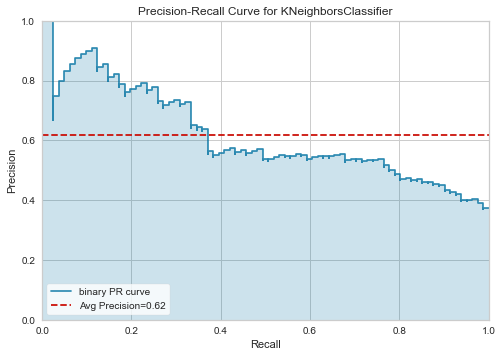

In [12]:
plot_model(knn_tuned_model, plot='pr')  #precision

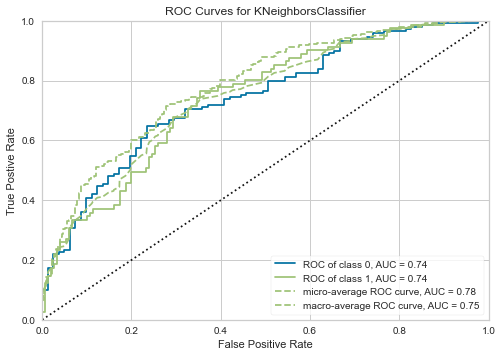

In [13]:
plot_model(knn_tuned_model, plot='auc')  #precision

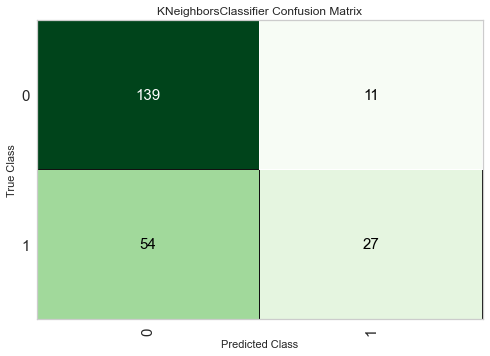

In [14]:
plot_model(knn_tuned_model, plot='confusion_matrix')   

Another way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [15]:
evaluate_model(knn_tuned_model)
#click different paramters to see results

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Classification 
Lets classify and predict model performance on test data

In [16]:
#divide train data (90%) and test data of diabetes dataset
explore_estimator= setup(data = diab_df, target = 'Class variable', train_size = 0.75)
 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3013
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


#shape

In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.7552,0,0.5512,0.69,0.6081,0.4343
1,Logistic Regression,0.7519,0.8013,0.5421,0.6893,0.6033,0.4269
2,Extreme Gradient Boosting,0.7518,0.8186,0.6114,0.6487,0.624,0.4409
3,Linear Discriminant Analysis,0.7517,0.8092,0.566,0.6753,0.6097,0.431
4,Gradient Boosting Classifier,0.75,0.8112,0.6114,0.6498,0.6243,0.4388
5,K Neighbors Classifier,0.7344,0.7511,0.571,0.6367,0.5962,0.4004
6,Ada Boost Classifier,0.7327,0.7934,0.5614,0.6315,0.5872,0.393
7,CatBoost Classifier,0.7326,0.8113,0.5612,0.6337,0.5884,0.3935
8,Random Forest Classifier,0.729,0.7723,0.5114,0.6386,0.5597,0.3706
9,Light Gradient Boosting Machine,0.7135,0.7898,0.5712,0.5861,0.5724,0.3596


In [18]:
#reducing no of cross fold will reduce training time. default sort paramer is accuracy.
#we can set it to an other metric too
compare_models(fold = 5, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.7414,0.8156,0.5727,0.6401,0.6012,0.4122
1,CatBoost Classifier,0.7414,0.8147,0.5822,0.6399,0.6053,0.4151
2,Gradient Boosting Classifier,0.7431,0.8115,0.5874,0.6437,0.6115,0.421
3,Linear Discriminant Analysis,0.7466,0.8035,0.5672,0.6565,0.6061,0.4218
4,Light Gradient Boosting Machine,0.7362,0.7967,0.5824,0.6344,0.6042,0.4077
5,Logistic Regression,0.7414,0.7906,0.5477,0.655,0.5958,0.4082
6,Ada Boost Classifier,0.7344,0.7869,0.5572,0.6406,0.5933,0.3981
7,Extra Trees Classifier,0.7118,0.7772,0.478,0.6019,0.529,0.3283
8,Random Forest Classifier,0.717,0.7714,0.4576,0.6221,0.5224,0.3314
9,K Neighbors Classifier,0.7188,0.745,0.5474,0.6042,0.5718,0.3644


In [19]:
#lets use light gradient booting ,ridge classifier
gb=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6724,0.7197,0.4500,0.5294,0.4865,0.2483
1,0.6897,0.7803,0.5000,0.5556,0.5263,0.2965
2,0.7759,0.8105,0.7500,0.6522,0.6977,0.5210
3,0.8276,0.8855,0.8500,0.7083,0.7727,0.6357
4,0.6897,0.6908,0.4500,0.5625,0.5000,0.2790
5,0.8103,0.8507,0.7143,0.7500,0.7317,0.5852
6,0.6842,0.8568,0.3500,0.5833,0.4375,0.2366
7,0.7719,0.8149,0.7000,0.6667,0.6829,0.5050
8,0.7719,0.8649,0.7000,0.6667,0.6829,0.5050
9,0.8246,0.9122,0.6500,0.8125,0.7222,0.5963


## Finalize model
ref:https://pycaret.org/finalize-model/
Finalize model is the last step in a typical supervised experiment workflow. When an experiment is started in PyCaret using setup, a hold-out set is created that is not being used in model training. By default, if no train_size parameter is defined in setup, hold-out set contains 30% sample of the dataset. All the functions in PyCaret use the remaining 70% as training set to create, tune or ensemble models. As such, the hold-out set is the final assurance and used for diagnosis of overfitting / underfitting. However, once the predictions are generated on hold-out set using predict_model and you have chosen to deploy the specific model, you want to train your model for one final time on the entire dataset including hold-out. Finalizing the model on entire dataset is as easy as writing finalize_model. This function takes trained model object and returns a model that has been trained on the entire dataset. 

This function is only available in pycaret.classification and pycaret.regression module. 

In [20]:
#finalize model parameters
final_model=finalize_model(gb)

In [21]:
#import unseen data for predict which is 30% of original dataset
pred_holdout=predict_model(gb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.7708,0.8341,0.6716,0.6716,0.6716,0.4956


In [ ]:
Lets do regression in next notebook